----------------------------------
# HOMEWORK 1 - PROGRAMMING PORTION
----------------------------------

Our purpose to programmatically investigate mouse brain cortex single-cell RNA expression data using PCA methods learned in class.

# 1) DATA PREPARATION

There has been confusion in class about how scanpy and anndata work, but with proper reading on these respective API's, all of scanpy and anndata classes will work as intended for this assignment.

Scanpy API: https://scanpy.readthedocs.io/en/stable/api.html

AnnData API: https://anndata.readthedocs.io/en/latest/api.html

__Counterintuitively, all of scanpy's functions require a _nxd_ matrix to produce our desired results. This is because of the way anndata's object data is structured, and the anndata class is embedded in the scanpy package. We can easily transpose our matrix to prove that we have obtained the correct orientation of data and performed the correct operations.__ 

In [1]:
#Import libraries
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import scanpy as sc
import anndata as an

In [2]:
#Read in files
counts = sc.read_mtx('GSE126074_AdBrainCortex_SNAREseq_cDNA.counts.mtx')
gene_data = pd.read_table('GSE126074_AdBrainCortex_SNAREseq_cDNA.genes.tsv', header = None)
barcode_data = pd.read_table('GSE126074_AdBrainCortex_SNAREseq_cDNA.barcodes.tsv', header = None)

The matrix is originally _dxn_, but we need it to be _nxd_ to assign feature and sample annotations. This is because of the way the AnnData class structures data. 

In other words, scanpy requires _nxd_ matrices as anndata objects to utilize its functions. More detailed information can be found in the AnnData API.

We will change it to _dxn_ later when we perform PCA.

In [3]:
#Rearrange the data and check lengths of annotation data
print(counts)
counts = an.AnnData.transpose(counts)
print(counts)
print(len(gene_data))
print(len(barcode_data))


AnnData object with n_obs × n_vars = 33160 × 10309
AnnData object with n_obs × n_vars = 10309 × 33160
33160
10309


Now we can assign gene and barcode annotations after ascertaining the lengths of each dimension of our matrix.

Then, we will re-transpose it back to _dxn_ as an AnnData object and show the shape of the data to confirm that we have obtained __X dxn__.

In [4]:
counts.var_names = gene_data
counts.obs_names = barcode_data
df_sc = counts.to_df()
df_sct = df_sc.transpose()
display(df_sct.head())
counts = an.AnnData(df_sct)
print(counts.shape)

,"(09A_CAGCCCCGCCTT,)","(09A_CGCCTACCATGA,)","(09A_GATGCGCGGCTA,)","(09A_GGTCCGAGTCCT,)","(09A_TCTCCCGGCACC,)","(09A_ACCAAATCTTGT,)","(09A_CTGCTCGAGCAT,)","(09A_CTCCCCCTAGCC,)","(09A_CACGGAATTAGG,)","(09A_ACGGACTACGCT,)",...,"(09L_CGTCACGATCTG,)","(09L_ACAGATCATGCC,)","(09L_CTGTACCTGGTC,)","(09L_GGATTGTGGTTC,)","(09L_AGCGCAGGCATG,)","(09L_TACTAGTTCAAG,)","(09L_ATGACGGGCCCC,)","(09L_GAAACACCTCAT,)","(09L_AACGGTTTATCC,)","(09L_GACTGATACAGT,)"
"(0610005C13Rik,)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0610007P14Rik,)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0610009B22Rik,)",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0610009E02Rik,)",0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0610009L18Rik,)",0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(33160, 10309)


                Our d x n matrix has 33160 genes and 10309 cells

As aforementioned, we have to first transpose our matrix back to _nxd_ to use scanpy functions. We will transpose the data back to _dxn_ to prove we performed the correct operation.

Now, let's show a distribution of highly expressed genes to see if we need to clean up our data.

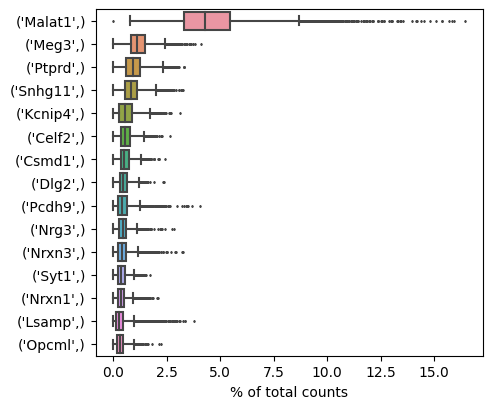

In [5]:
counts_t = an.AnnData.transpose(counts)
sc.pl.highest_expr_genes(counts_t, n_top=15, )

We see outliers in our data, so let's clean up the data.

First, we do basic filtration by filtering cells with fewer than 200 genes expressed.
Then, we filter genes which are expressed in fewer than 3 cells.

In [6]:
sc.pp.filter_cells(counts_t, min_genes=200)
sc.pp.filter_genes(counts_t, min_cells=3)
counts_t2 = sc.AnnData.transpose(counts_t)
print(counts_t2.shape)

(25403, 10309)


                Our filtered dxn matrix has 25403 genes and 10309 cells

Per _Islam et al. 2014; Ilicic et al. 2016_, we should also filter mitochondrial genes in case some cells tore during the technical sc-RNA expression workflow. If cells perforated, this means we lost some cytoplasmic transcripts but retained the mitochondrial transcripts, since mitochondria are larger than cytoplasmic RNA. This would show a disproportionate amount of mitochondrial gene expression in our data.

Unfortunately, we do not have mitochondrial gene annotations available in our gene name data to do this... 

However, we can still eliminate genes which are expressed too highly in our cells!

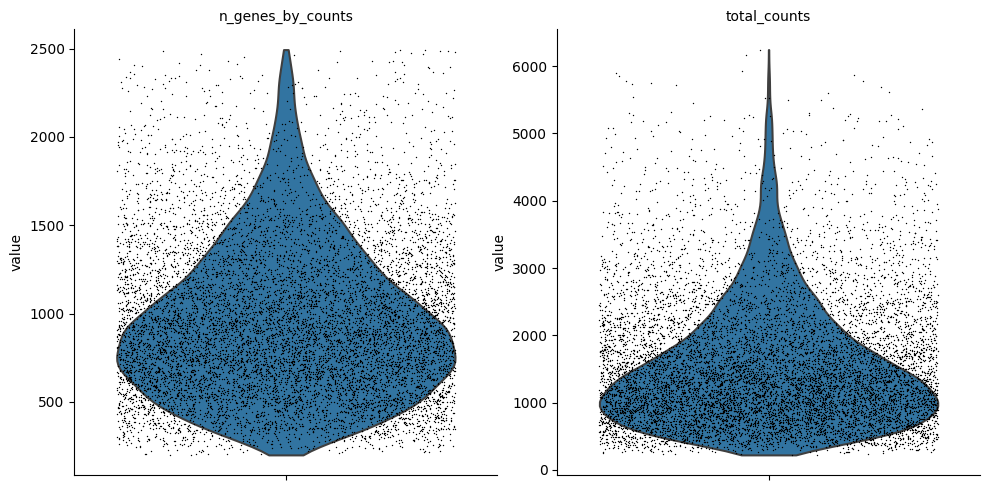

In [7]:
#Calculate quality control metrics by which we can slice our data accordingly.
sc.pp.calculate_qc_metrics(counts_t, percent_top=None, log1p=False, inplace=True)
sc.pl.violin(counts_t, ['n_genes_by_counts', 'total_counts'], jitter=0.4, multi_panel=True)

Our gene distribution appears to include the majority of our data, with few outliers. However, our total count distribution could be subjected to a qualitatively assessed threshold of 5000 total counts.

Let's show another kind of visualization so we can be sure this would work.

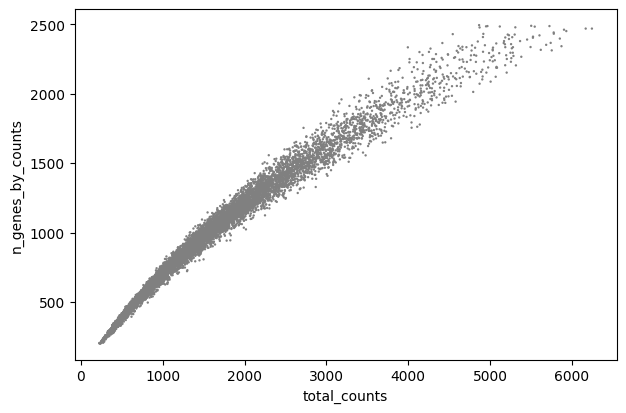

In [8]:
sc.pl.scatter(counts_t, x='total_counts', y='n_genes_by_counts')

Ideally, we will have a distribution which is not too dispersed orthogonally. Let's try!

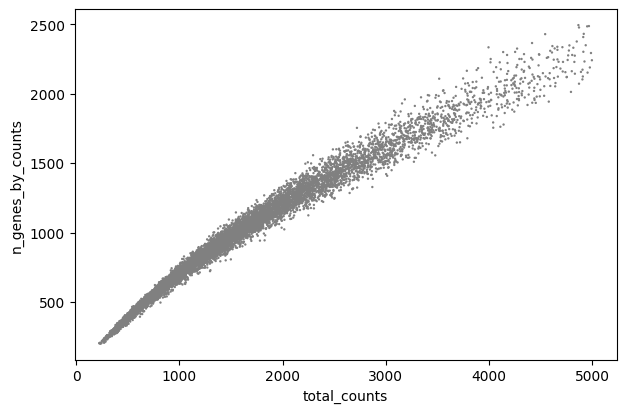

(25403, 10248)


In [9]:
#counts_t = counts_t[counts_t.obs.n_genes_by_counts < 2500, :]
counts_t = counts_t[counts_t.obs.total_counts < 5000, :]
sc.pl.scatter(counts_t, x='total_counts', y='n_genes_by_counts')
#Print the shape of our data
counts_t2 = sc.AnnData.copy(counts_t)
counts_t2 = sc.AnnData.transpose(counts_t2)
print(counts_t2.shape)


                Our quality-controlled dxn matrix has 25403 genes and 10248 cells

This data is very noisy because of the wide dispersion. However, it appears we are viewing the majority of the data. Next, we need to normalize our data.

We will show the sums of a few arbitrary cells and normalize using an arbitrary target sum, then, we will apply a logarithmic transformation to eliminate 0 values.

In [10]:
print(counts_t.X[0,:].sum())
print(counts_t.X[1,:].sum())
print(counts_t.X[20,:].sum())
print(counts_t.X[40,:].sum())

4615.0
4780.0
3334.0
3005.0


In [11]:
#Use scanpy's normalization function
sc.pp.normalize_total(counts_t, target_sum=10000)
print(counts_t.X[0,:].sum())
print(counts_t.X[1,:].sum())
print(counts_t.X[20,:].sum())
print(counts_t.X[40,:].sum())

10000.0
10000.0
10000.0
10000.0


In [12]:
#Use scanpy's normalization function
sc.pp.log1p(counts_t)
print(counts_t.X[0,:].sum())
print(counts_t.X[1,:].sum())
print(counts_t.X[20,:].sum())
print(counts_t.X[40,:].sum())

3330.874
3313.5925
3012.5889
2897.1807


Great, so now we have normalized our data.

Next, we need to filter the highly variable genes in our data because our PCA retains variation while reduced _d_ features, so we want to capture as much variation as possible.

We will plot this to show the variation in our normalized and non-normalized data.

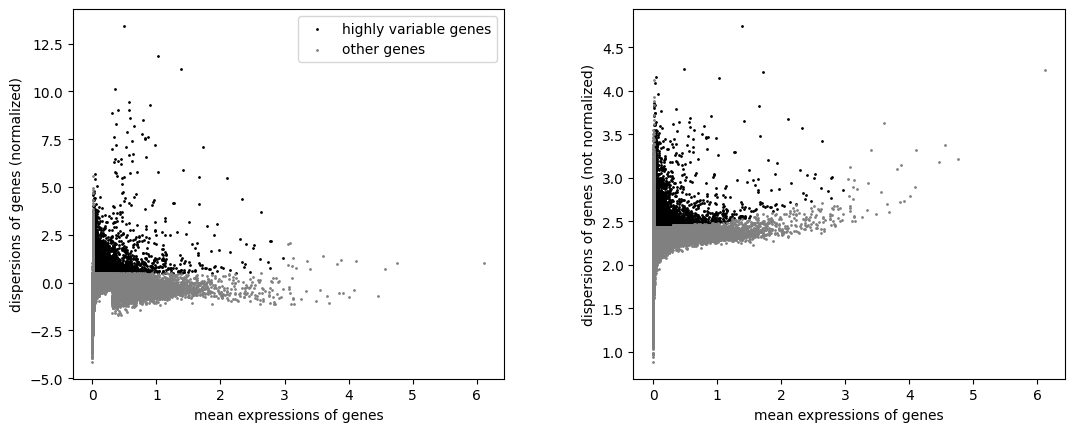

In [13]:
#Our parameters are standard.
sc.pp.highly_variable_genes(counts_t, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(counts_t)

Cool! We've successfully normalized while retaining highly variable genes.

Next, we're going to do some housekeeping and save a copy of our data.

If we had the mitochondrial annotations on our data then we would be able to regress out the effect that those genes have on the noise of our data. After regressing, we scale our data accordingly to compensate for this regression and removing counts which deviate by more than 10.

We could regress out the effect the total_counts have on our data and scale accordingly.
For this homework, we will not perform these functions because the TA said we did not have to do this.

In [14]:
#Regress out the total counts per cell contributing to noise and scale the data to remove counts with a standard deviation > 10
# sc.pp.regress_out(counts_t, ['total_counts'])
#sc.pp.scale(counts_t, max_value=10)
counts_t.raw = counts_t

Now, let's show our data to prove we have performed the correct operations and obtained a cleaned-up __X dxn__ dataset.

In [15]:
df_sc = counts_t.to_df()
df_sct = df_sc.transpose()
display(df_sct.head())
counts_t = an.AnnData(df_sct)
print(counts_t.shape)

,"(09A_CAGCCCCGCCTT,)","(09A_CGCCTACCATGA,)","(09A_GATGCGCGGCTA,)","(09A_GGTCCGAGTCCT,)","(09A_TCTCCCGGCACC,)","(09A_ACCAAATCTTGT,)","(09A_CTGCTCGAGCAT,)","(09A_CTCCCCCTAGCC,)","(09A_CACGGAATTAGG,)","(09A_ACGGACTACGCT,)",...,"(09L_CGTCACGATCTG,)","(09L_ACAGATCATGCC,)","(09L_CTGTACCTGGTC,)","(09L_GGATTGTGGTTC,)","(09L_AGCGCAGGCATG,)","(09L_TACTAGTTCAAG,)","(09L_ATGACGGGCCCC,)","(09L_GAAACACCTCAT,)","(09L_AACGGTTTATCC,)","(09L_GACTGATACAGT,)"
"(0610005C13Rik,)",0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0610007P14Rik,)",0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0610009B22Rik,)",1.152737,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0610009E02Rik,)",0.000000,1.984602,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.411411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0610009L18Rik,)",0.000000,1.128834,0.0,1.145668,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(25403, 10248)


                We've obtained X dxn where d = 25403 and n = 10248

                            Yeehaw! Great Success!

# 2) DIMENSION REDUCTION

### 2.1) Use PCA to reduce _d_ to _p_ while retaining 60% variance

We need to reduce our dimension _d_ to _p_, thereby using PCA to reduce __X dxn__ to __Xbar pxn__. 

Our procedure dictates that we must choose some _p << d_ where the percent variance, or _alpha_, evaluates to 60% based on the variance ratios given by each principal component. 
Let's try _p_ = 100 and rank the principal components to qualitatively assess the variance ratios for each one.

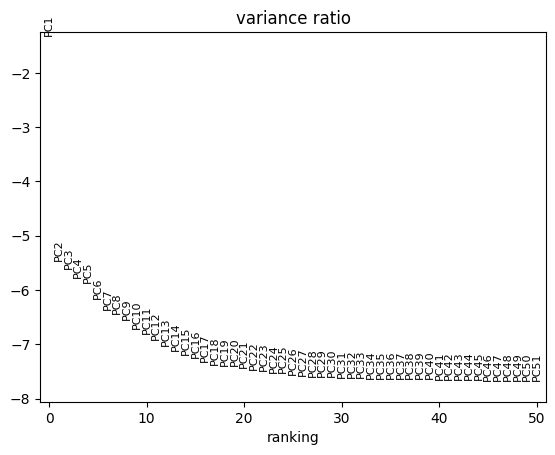

In [16]:
# #Utilize a tool which applies PCA annotations to our data
sc.tl.pca(counts_t, svd_solver='arpack', n_comps=100)
#Rank the PC's to assess the ratio of variance
sc.pl.pca_variance_ratio(counts_t, log = True, n_pcs=50)

This looks promising, but the only way to know if we've retained 60% variance by using 200 principal components is to calculate _alpha_ from the variance ratios returned by the covariance matrices given by the evaluation of each individual principal component.

Our procedure is explained as follows:

_alpha_ = sum(eigenvalue(_i_)/eigenvalue(_total_)) from _i_ to _p_


In [17]:
#Loop through variance_ratios and calculate alpha percentage
var_arr = counts_t.uns['pca']['variance_ratio']
x=0
for i in var_arr:
    x += i*100
print(x)

33.51541460142471


                ~34% variance is retained when p = 100

This is not good enough! We need more principal components. 

Let's try _p_ = 1000.

In [ ]:
sc.tl.pca(counts_t, svd_solver='arpack', n_comps=1000)
var_arr = counts_t.uns['pca']['variance_ratio']
x=0
for i in var_arr:
    x += i*100
print(x)

58.95327599719167


                We have retained almost ~59% variance when p = 1000
                                Boo! This sucks!

_p = 1000_ is a very high _p_ relative to _d_, which further indicates that our data is very __noisy__. 

This makes sense because we were not able to filter mitochondrial genes from our data, and they could be contributing to the noise.

However, PCA using 1000 principal components is very tasking on the computer. We really should only need to use around 50-100 principal components. 

_For this homework, both the professor and the TA recommended against using 1000 principal components and instead advised to use a maximum of 100, although we are retaining less than half of the variance of our original data in doing so._

__The remaining analysis will be done on 100 principal components for expediency.__

### 2.2) Project data back to original space

For the next step, we are going to use sklearn's functions. Sklearn uses dxn pandas dataframes as input for its associated PCA and projection functions.

In [18]:
#Convert data back to a data frame
counts_df = counts_t.to_df()
counts_df.head()

,"(09A_CAGCCCCGCCTT,)","(09A_CGCCTACCATGA,)","(09A_GATGCGCGGCTA,)","(09A_GGTCCGAGTCCT,)","(09A_TCTCCCGGCACC,)","(09A_ACCAAATCTTGT,)","(09A_CTGCTCGAGCAT,)","(09A_CTCCCCCTAGCC,)","(09A_CACGGAATTAGG,)","(09A_ACGGACTACGCT,)",...,"(09L_CGTCACGATCTG,)","(09L_ACAGATCATGCC,)","(09L_CTGTACCTGGTC,)","(09L_GGATTGTGGTTC,)","(09L_AGCGCAGGCATG,)","(09L_TACTAGTTCAAG,)","(09L_ATGACGGGCCCC,)","(09L_GAAACACCTCAT,)","(09L_AACGGTTTATCC,)","(09L_GACTGATACAGT,)"
"(0610005C13Rik,)",0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0610007P14Rik,)",0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0610009B22Rik,)",1.152737,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0610009E02Rik,)",0.000000,1.984602,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.411411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0610009L18Rik,)",0.000000,1.128834,0.0,1.145668,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


                    This matrix is X dxn

To project the data back to the original data, we are going to utilize sklearn's PCA function using p = 100 to obtain __Xbar pxn__.

Sklearn has a convenient function to project the reduced data back to the original space and obtain __X hat dxn__.

In [20]:
import sklearn as sk
from sklearn.decomposition import PCA
pca_object = PCA(n_components=100, random_state=500)
#Sklearn uses pandas dataframes in a dxn format for its functions.
pca_object.fit(counts_df)
pca_res = pd.DataFrame(pca_object.components_.transpose(),
                             columns=['PC%s' % _ for _ in range(100)],
                             index=counts_df.columns)
pxn_df = pca_res.transpose()
pxn_df.head()

,"(09A_CAGCCCCGCCTT,)","(09A_CGCCTACCATGA,)","(09A_GATGCGCGGCTA,)","(09A_GGTCCGAGTCCT,)","(09A_TCTCCCGGCACC,)","(09A_ACCAAATCTTGT,)","(09A_CTGCTCGAGCAT,)","(09A_CTCCCCCTAGCC,)","(09A_CACGGAATTAGG,)","(09A_ACGGACTACGCT,)",...,"(09L_CGTCACGATCTG,)","(09L_ACAGATCATGCC,)","(09L_CTGTACCTGGTC,)","(09L_GGATTGTGGTTC,)","(09L_AGCGCAGGCATG,)","(09L_TACTAGTTCAAG,)","(09L_ATGACGGGCCCC,)","(09L_GAAACACCTCAT,)","(09L_AACGGTTTATCC,)","(09L_GACTGATACAGT,)"
PC0,0.013204,0.012952,0.012787,0.012903,0.012846,0.012970,0.012706,0.012353,0.013380,0.012418,...,0.005580,0.004097,0.002786,0.006369,0.006041,0.002505,0.006542,0.006065,0.005774,0.006213
PC1,0.008504,-0.005221,-0.009772,-0.001782,-0.005597,0.001221,0.001290,-0.004797,0.008686,0.015383,...,-0.005585,-0.006020,-0.005835,-0.002011,-0.005896,-0.008300,-0.005739,-0.003110,-0.013285,-0.001489
PC2,0.006026,-0.010108,0.008042,-0.006386,-0.016930,-0.008022,-0.007178,-0.005991,-0.003499,0.004174,...,0.002594,0.005577,0.007766,0.001018,0.002914,0.002782,0.000563,0.001153,0.000081,0.000170
PC3,0.001377,-0.003988,-0.006462,0.000085,-0.010059,-0.003452,0.000609,0.006448,-0.010001,-0.022178,...,-0.008147,-0.005360,0.001987,-0.003321,-0.005353,-0.001365,0.002802,-0.004154,-0.001485,-0.003326
PC4,-0.009127,-0.010064,-0.022769,-0.000357,-0.011171,-0.006842,-0.003374,-0.014243,-0.008936,0.000591,...,-0.001977,-0.002346,0.001674,0.009432,0.005099,0.002533,-0.002595,0.004746,-0.001859,0.000894


                This matrix is Xbar pxn

Now, let's perform the projection.

In [21]:
pca_res_2 = pca_object.transform(counts_df)
proj_counts = pca_object.inverse_transform(pca_res_2)
proj_counts_df = pd.DataFrame(proj_counts, columns = counts_df.columns, index= counts_df.index)
proj_counts_df.head()

,"(09A_CAGCCCCGCCTT,)","(09A_CGCCTACCATGA,)","(09A_GATGCGCGGCTA,)","(09A_GGTCCGAGTCCT,)","(09A_TCTCCCGGCACC,)","(09A_ACCAAATCTTGT,)","(09A_CTGCTCGAGCAT,)","(09A_CTCCCCCTAGCC,)","(09A_CACGGAATTAGG,)","(09A_ACGGACTACGCT,)",...,"(09L_CGTCACGATCTG,)","(09L_ACAGATCATGCC,)","(09L_CTGTACCTGGTC,)","(09L_GGATTGTGGTTC,)","(09L_AGCGCAGGCATG,)","(09L_TACTAGTTCAAG,)","(09L_ATGACGGGCCCC,)","(09L_GAAACACCTCAT,)","(09L_AACGGTTTATCC,)","(09L_GACTGATACAGT,)"
"(0610005C13Rik,)",0.008617,0.007800,0.021876,0.010053,0.011032,0.002469,0.014907,0.006402,0.005096,0.012210,...,0.016256,0.007225,-0.001555,0.016359,-0.010169,-0.000705,0.002301,0.002312,-0.001682,0.003819
"(0610007P14Rik,)",0.107103,0.116115,0.089205,0.124899,0.101209,0.121292,0.136847,0.088222,0.102204,0.075298,...,0.089579,0.073571,0.048912,0.034334,-0.101639,-0.002780,0.027104,-0.001344,0.028672,-0.006838
"(0610009B22Rik,)",0.068397,0.029026,0.045272,0.035763,0.042790,0.026509,0.017890,0.033188,0.039485,0.014220,...,-0.020069,0.009518,0.019583,-0.004791,0.000698,0.047670,0.015946,-0.018712,0.036267,-0.040982
"(0610009E02Rik,)",0.051093,0.049938,0.067228,0.046418,0.017258,0.057444,0.036948,0.051528,0.045954,0.050099,...,0.036617,-0.014463,0.013128,0.002520,0.035595,0.023302,0.009332,-0.020277,0.047253,-0.011850
"(0610009L18Rik,)",0.046522,0.082641,0.098119,0.046982,0.027523,0.060435,0.011414,0.058471,0.017631,0.036327,...,0.042454,-0.012320,0.035193,0.056667,-0.017584,0.028174,-0.037174,0.006802,0.042062,0.038285


                This matrix is Xhat dxn

Now, let's plot our PCA results from the scanpy PCA function we utilized earlier.

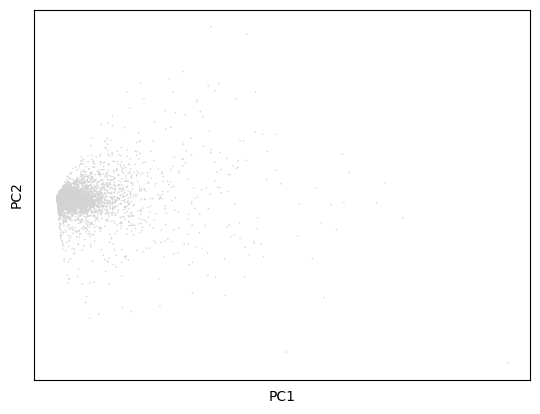

In [22]:
sc.pl.pca(counts_t)

This kind of "volcano-like" distribution also confirms that our data is pretty noisy not characterized very well by either PC1 or PC2, despite both PC1 and PC2 contributing the most to the variance in the dataset.

# 3) Clustering of X dxn, Xbar pxn, and Xhat dxn

Let's cluster our data using a couple different methods. We explore leiden, louvain, and paga clustering. We also utilize the umap tool to add convenient graphing annotations to our data by which we can colorize using the leiden, louvain, and paga clustering annotations.

In [23]:
#Perform clustering for X dxn
counts_t = sc.AnnData(counts_df.transpose())
sc.pp.neighbors(counts_t)
sc.tl.umap(counts_t)
sc.tl.leiden(counts_t)
sc.tl.louvain(counts_t)
sc.tl.paga(counts_t)

         Falling back to preprocessing with `sc.pp.pca` and default params.


In [24]:
#Perform clustering for Xbar pxn
pxn_df_an = sc.AnnData(pxn_df.transpose())
sc.pp.neighbors(pxn_df_an)
sc.tl.umap(pxn_df_an)
sc.tl.leiden(pxn_df_an)
sc.tl.louvain(pxn_df_an)
sc.tl.paga(pxn_df_an)

         Falling back to preprocessing with `sc.pp.pca` and default params.


In [25]:
#Perform clustering for Xhat dxn
proj_df_an = sc.AnnData(proj_counts_df.transpose())
sc.pp.neighbors(proj_df_an)
sc.tl.umap(proj_df_an)
sc.tl.leiden(proj_df_an)
sc.tl.louvain(proj_df_an)
sc.tl.paga(proj_df_an)

         Falling back to preprocessing with `sc.pp.pca` and default params.


Our warnings are actually informative to tell us what the dimension of our feature axis is within our data.

# 4) UMAP Visualization of clusters with X dxn, Xbar pxn, Xhat dxn

Now, let's visualize the clusters using scanpy's umap plotting function. Let's visualize all three clustering algorithms we implemented

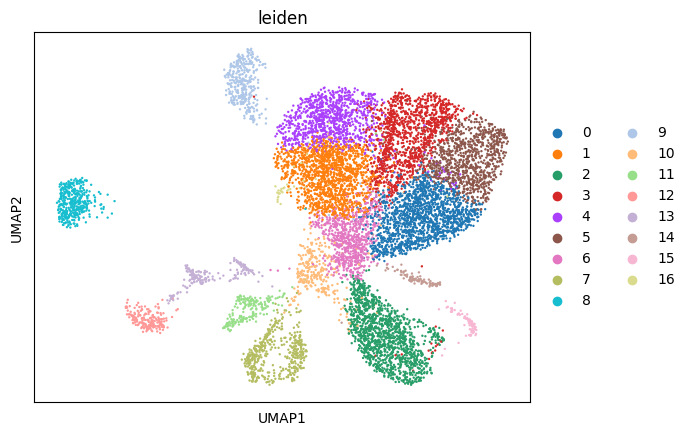

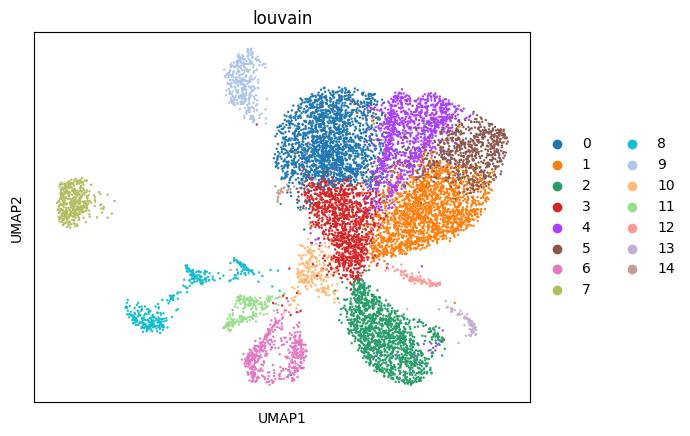

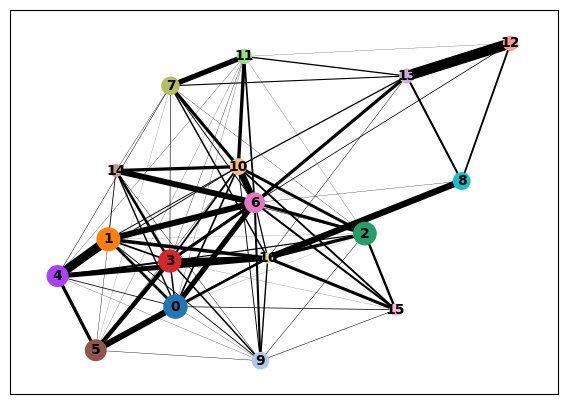

In [26]:
sc.pl.umap(counts_t, color = ['leiden'])
sc.pl.umap(counts_t, color = ['louvain'])
sc.pl.paga(counts_t)

                X dxn cluster graphs look great!

Let's interpret this. Notice how our Leiden and Paga algorithms gave 16 clusters while our Louvain algorithm gave 14 clusters. The Leiden clustering appears to be more intuitive because it clusters based on the space between points, whereas Louvain clusters based on their closeness. Paga clustering gives us directional weights between the clusters with the size of the cluster indicated by the size of the colored dot and the association between them given by the thickness of the line connecting them.

Let's visualize our dimentionally reduced data.

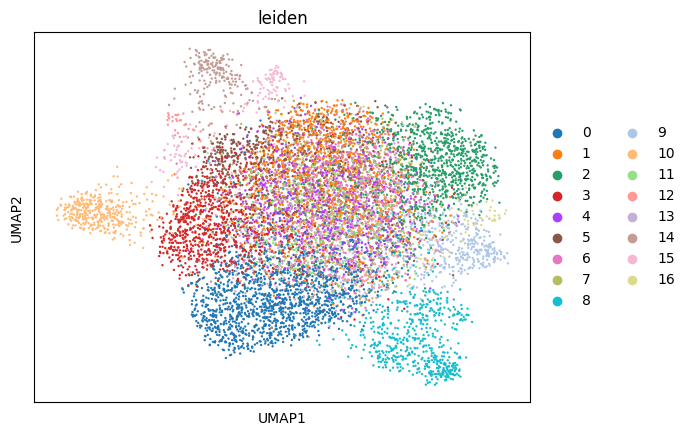

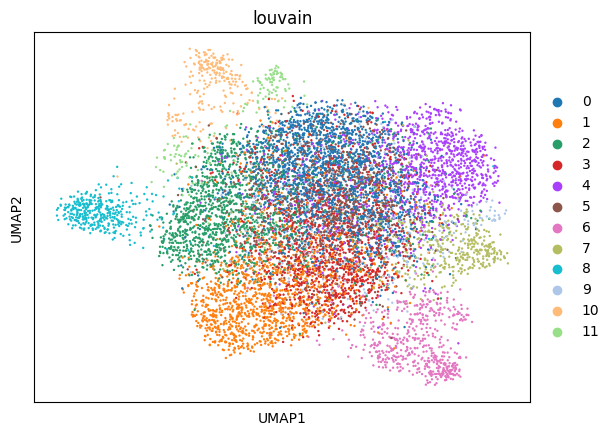

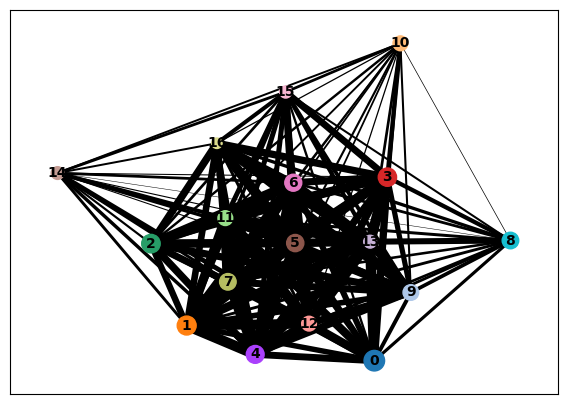

In [29]:
sc.pl.umap(pxn_df_an, color = ['leiden'])
sc.pl.umap(pxn_df_an, color = ['louvain'])
sc.pl.paga(pxn_df_an)

                Xbar pxn clusters look crazy!

Our dimensionally reduced clusters are overlapping and indescernible. This indicates that our data is probably very similar and not enough variance was retained. Likely this is an effect of mitochondrial genes not being filtered out. However, it is interesting to note that the Leiden and Paga algorithms still gave 16 clusters, whereas Louvain actually reduced the number of clusters in __Xbar pxn__.

Now, what does our reconstructed data look like?

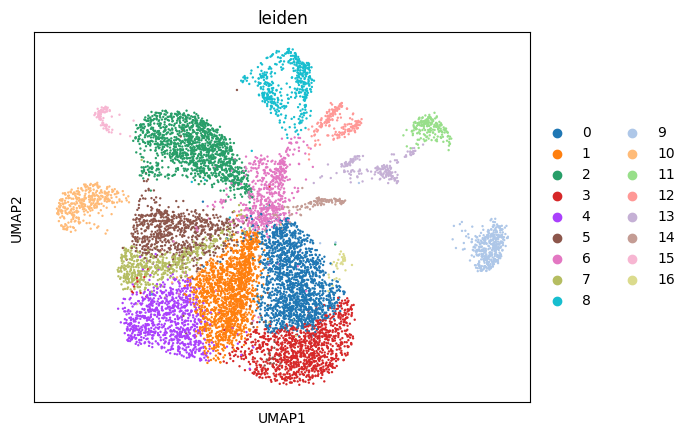

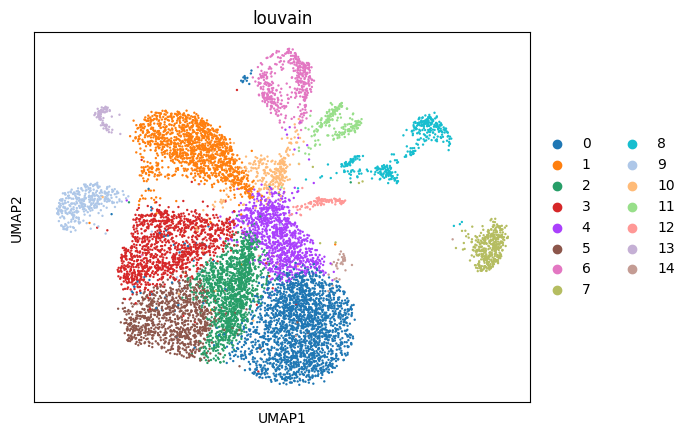

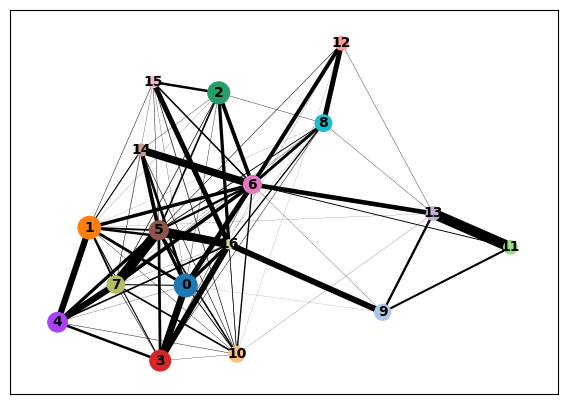

In [30]:
sc.pl.umap(proj_df_an, color = ['leiden'])
sc.pl.umap(proj_df_an, color = ['louvain'])
sc.pl.paga(proj_df_an)

                Wow! Xhat dxn looks flipped around!

Our reconstructed data appears to be inverted from our original data, but with retained shape and clustering.

# 5) Marker Genes

### 5.1) Find marker genes for each cluster in __X dxn__

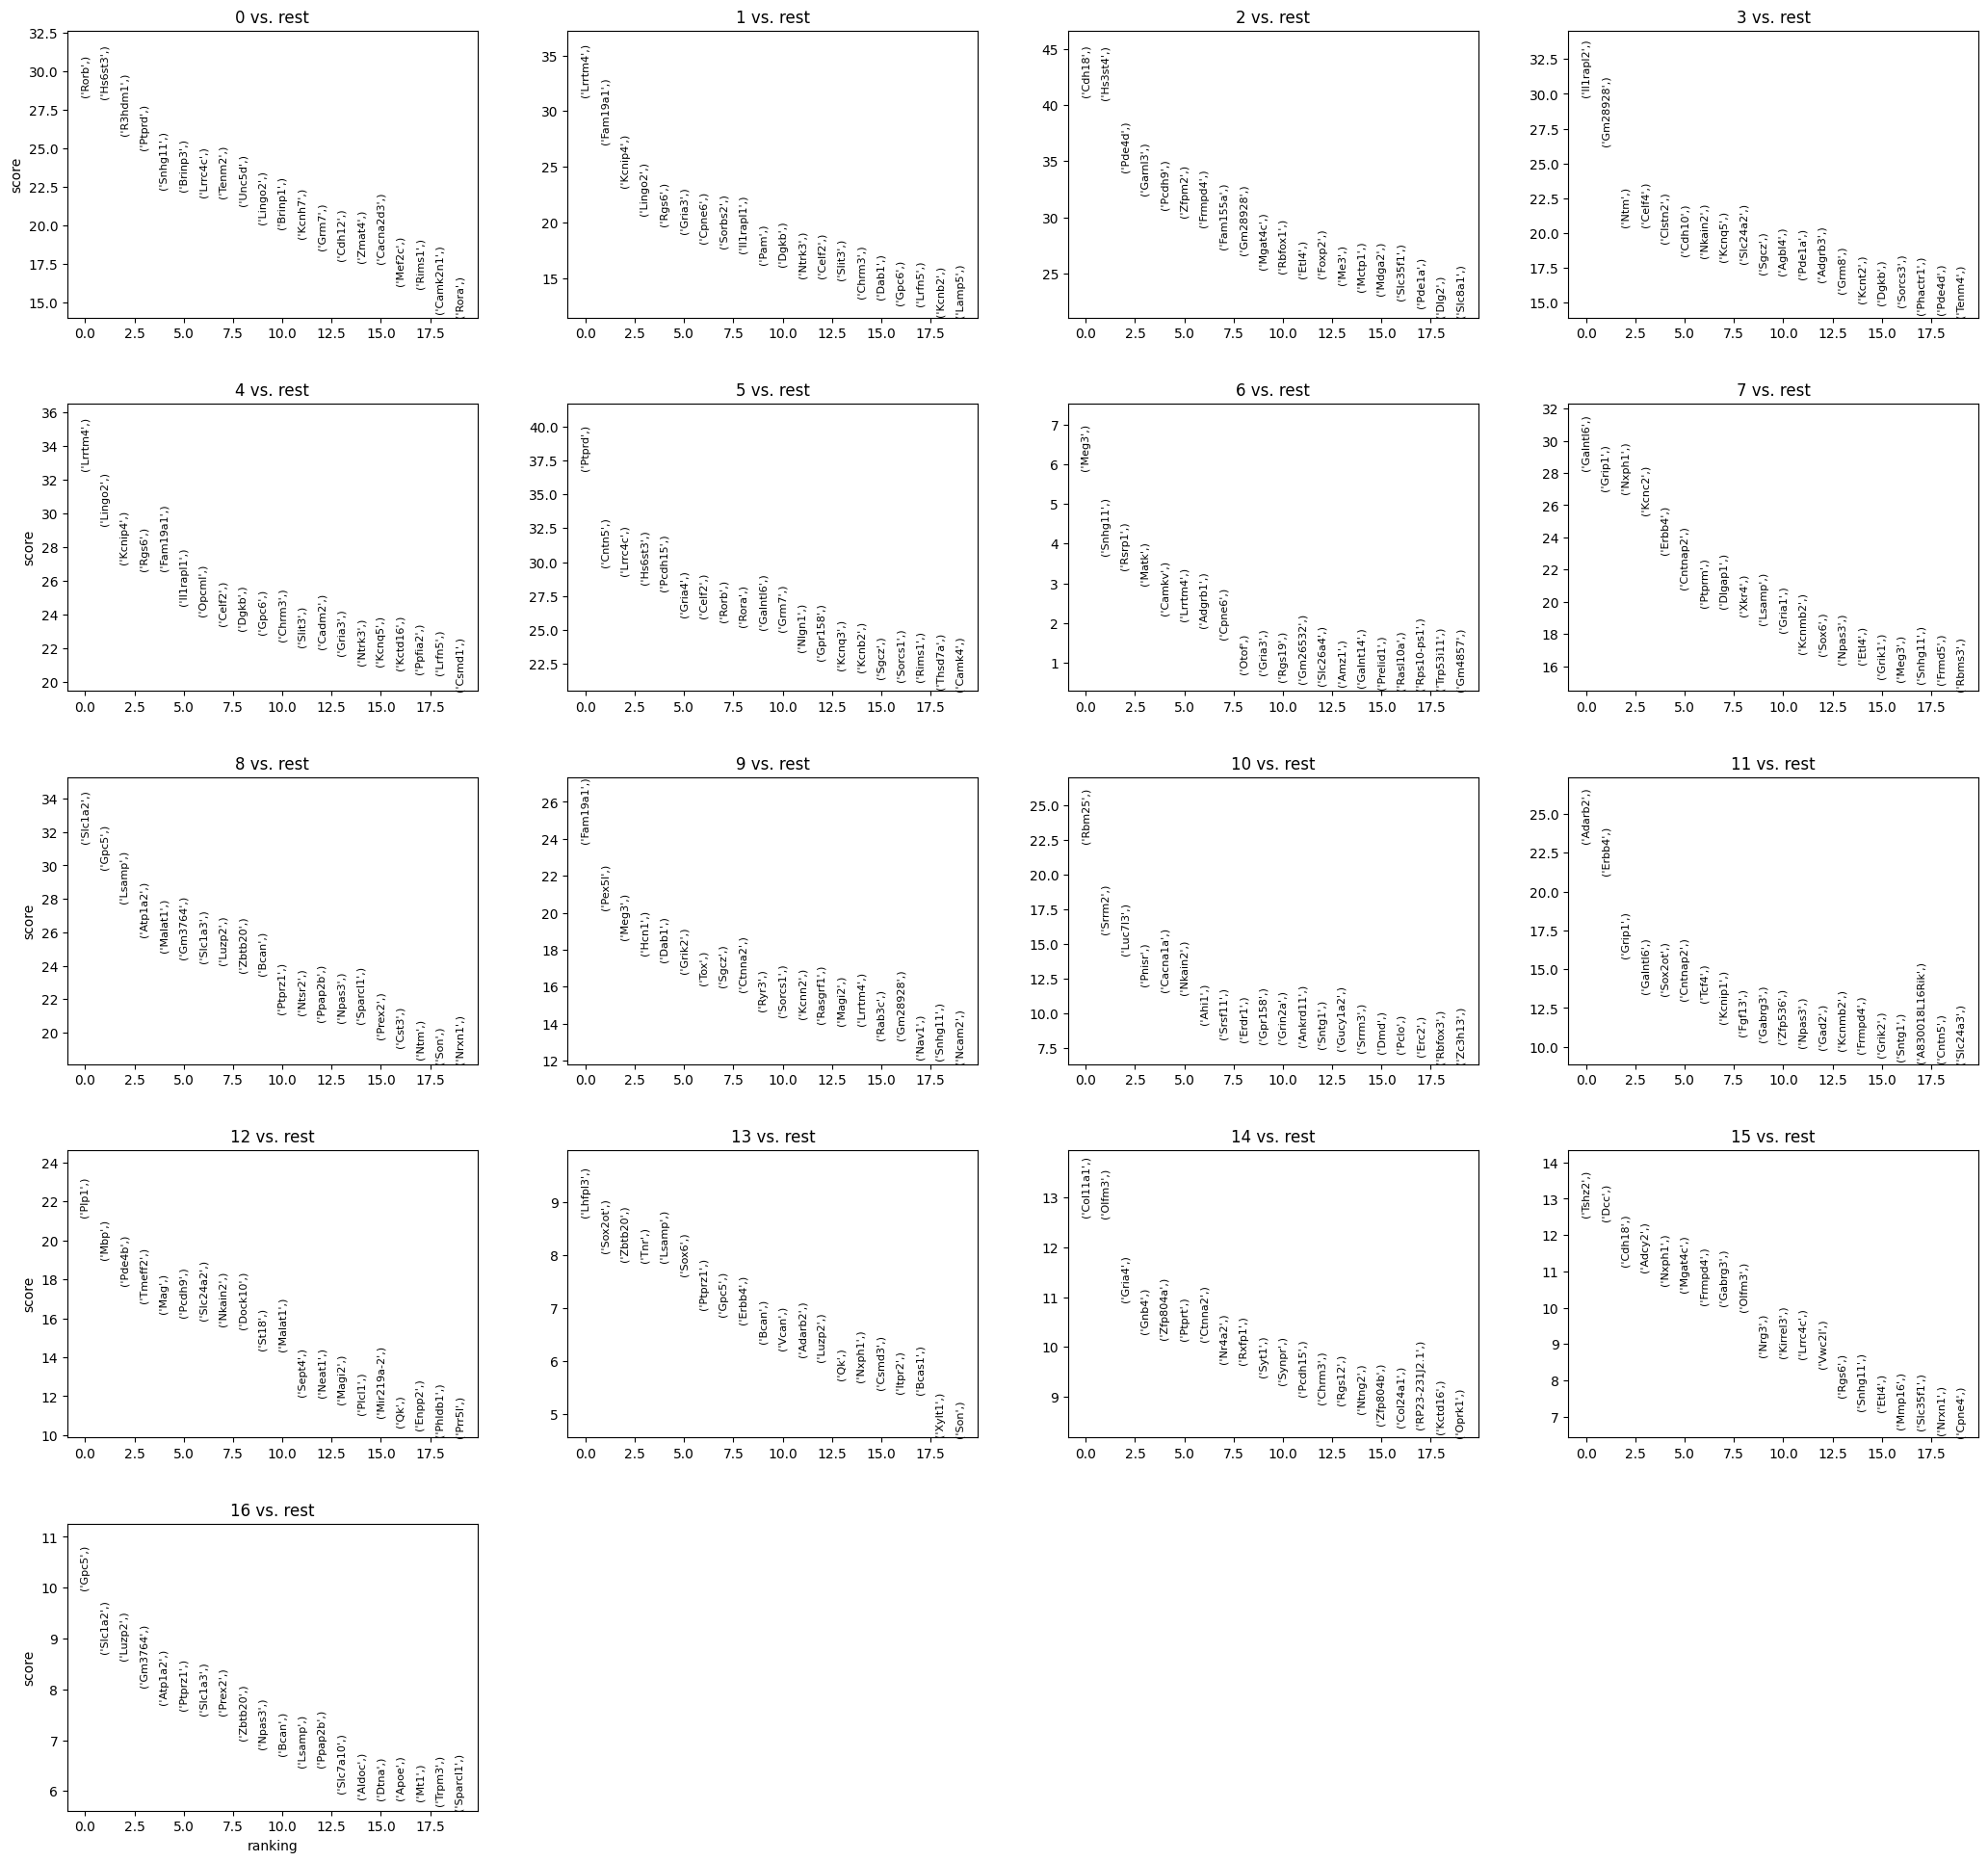

In [31]:
sc.tl.rank_genes_groups(counts_t, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(counts_t, n_genes=20, sharey=False)

### 5.2) Find marker genes for each cluster in __Xhat dxn__

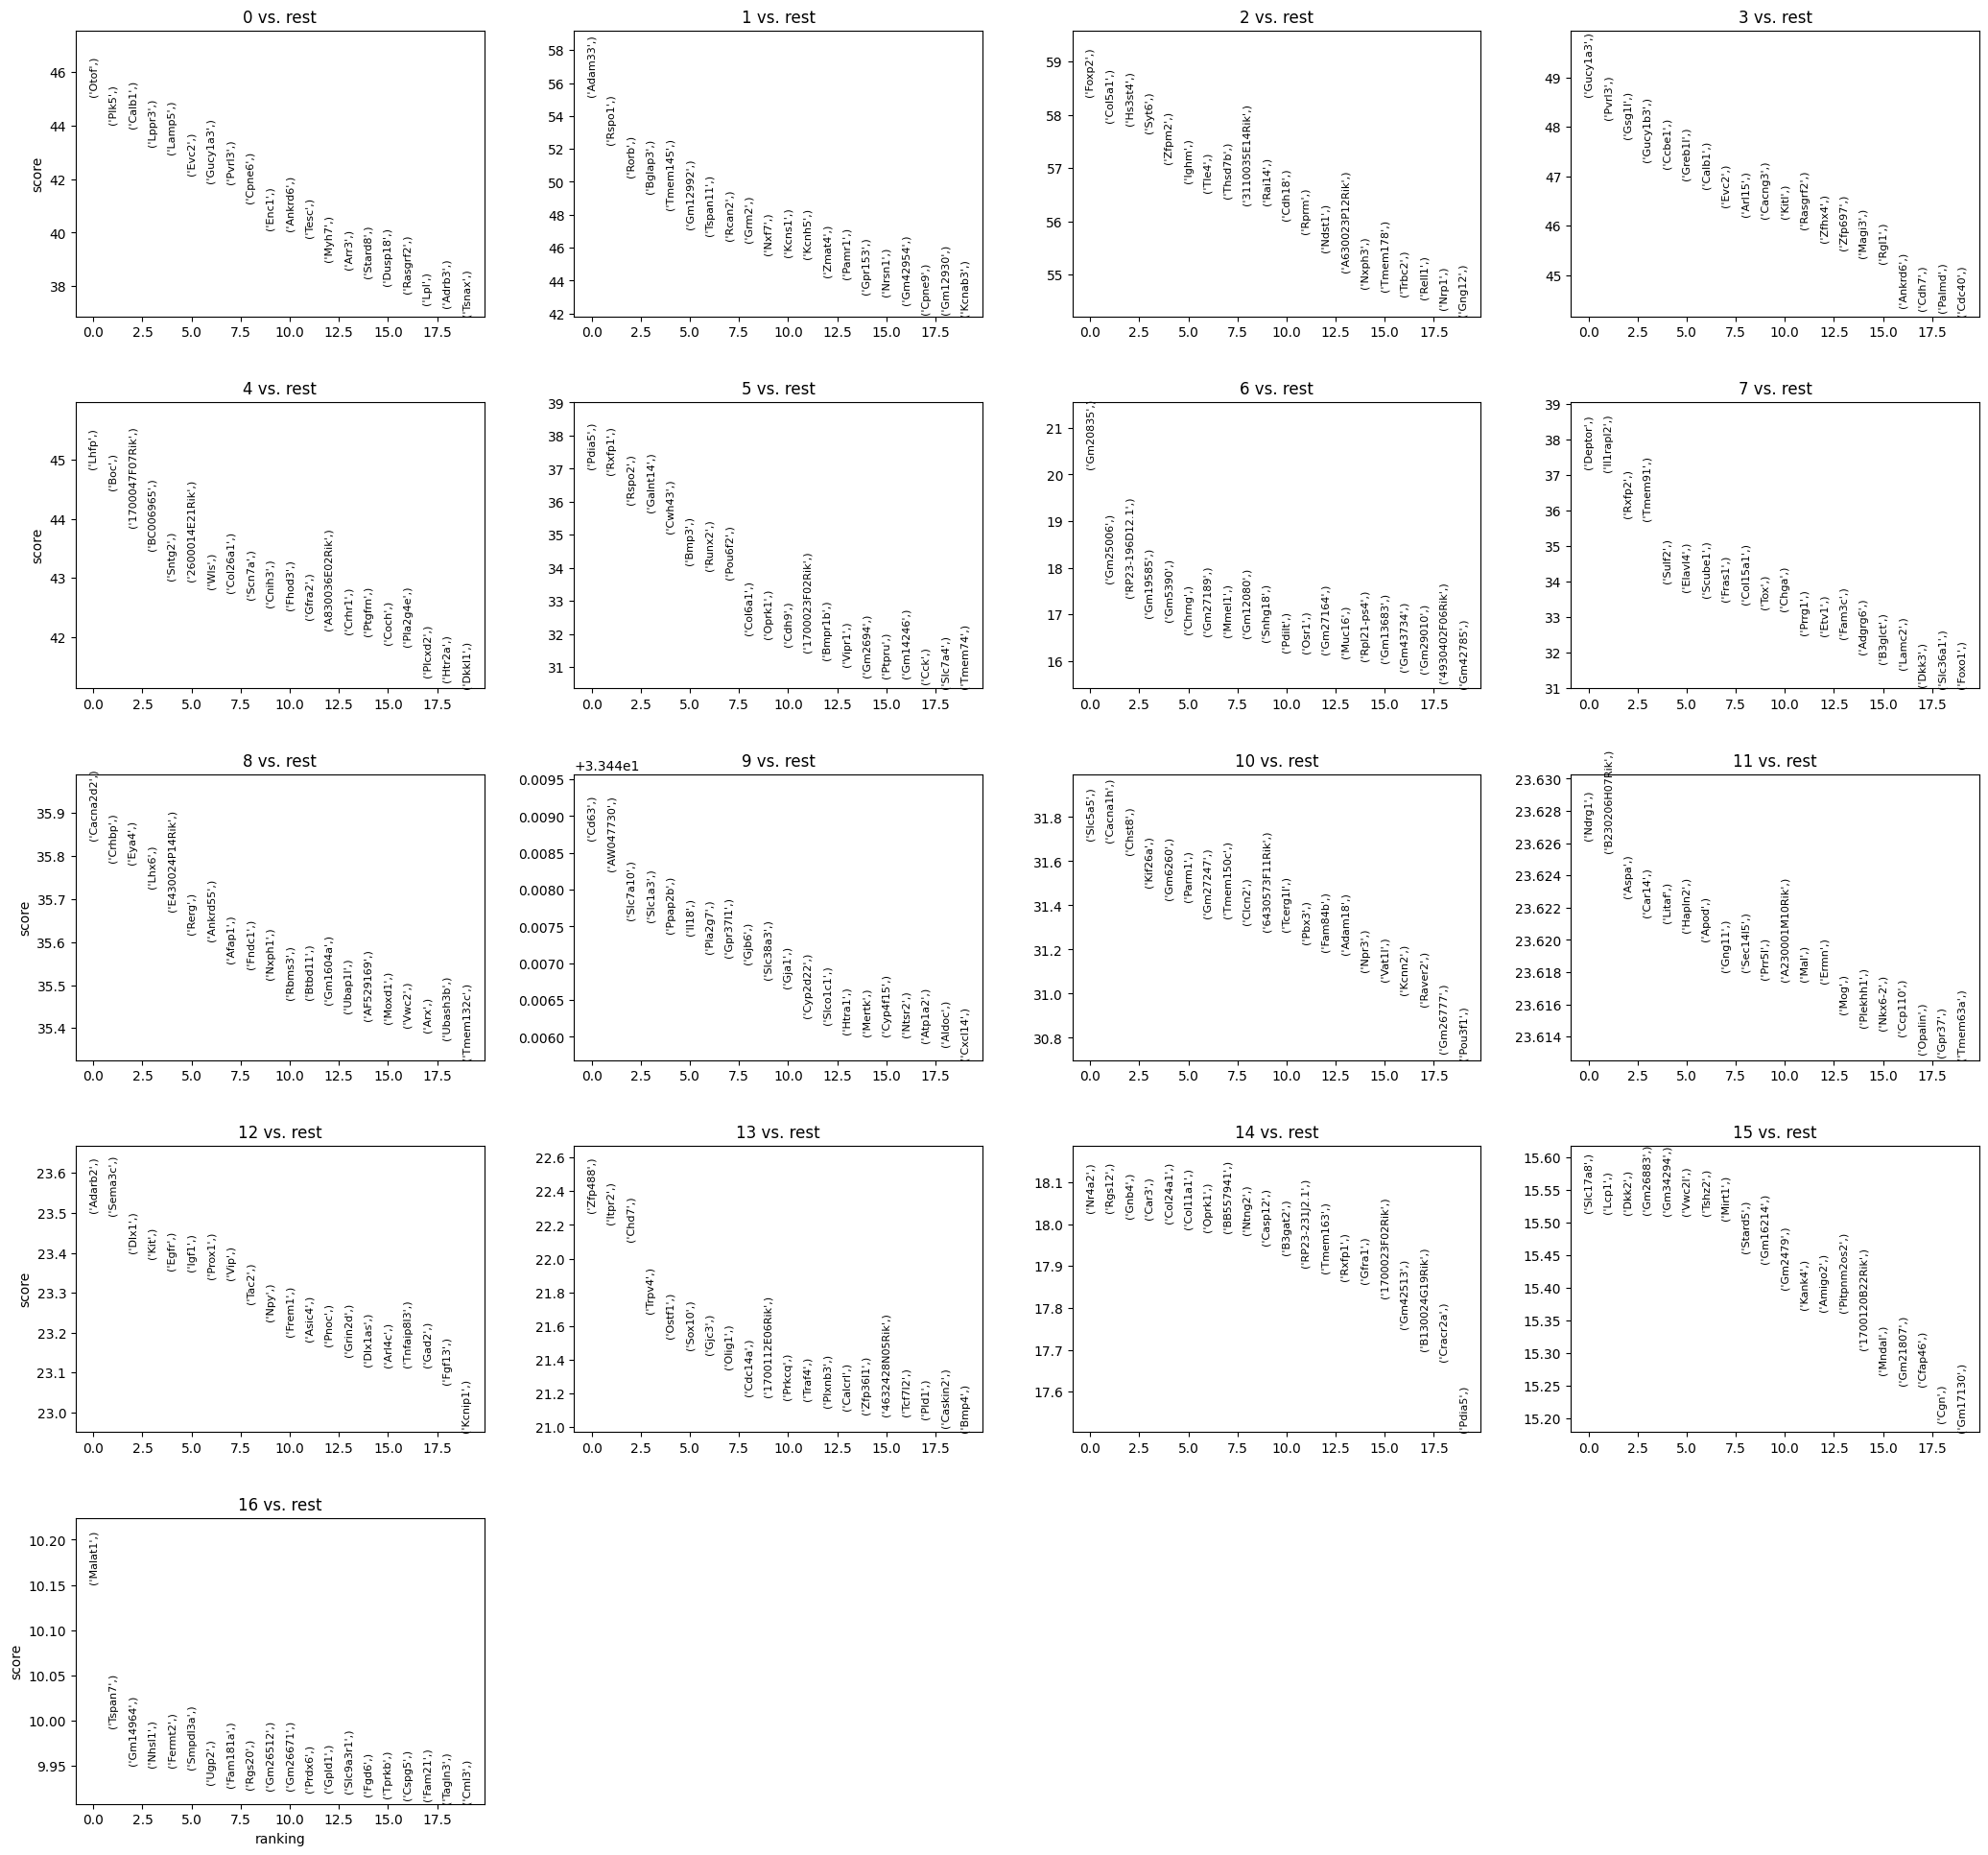

In [34]:
sc.tl.rank_genes_groups(proj_df_an, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(proj_df_an, n_genes=20, sharey=False)

Our results generally show the ranking score of each marker gene relative to the cluster it belongs to. For example, 'Malat1' is more highly differential and characterizes cluster 2 in the Xhat dxn data, but doesn't well characterize any of the clusters in the X dxn data. 

Clusters which show a single gene ranking highly compared to the rest means that the cluster is significantly highly differential from the rest of the marker genes in that cluster.A cluster with all genes being indicative of that cluster would score similarly. 

In other words, gene scoring more highly characterize that cluster and are therefore _marker genes_.

### 5.3) Identify top 20 genes

In [32]:
pd.DataFrame(counts_t.uns['rank_genes_groups']['names']).head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,"(Rorb,)","(Lrrtm4,)","(Cdh18,)","(Il1rapl2,)","(Lrrtm4,)","(Ptprd,)","(Meg3,)","(Galntl6,)","(Slc1a2,)","(Fam19a1,)","(Rbm25,)","(Adarb2,)","(Plp1,)","(Lhfpl3,)","(Col11a1,)","(Tshz2,)","(Gpc5,)"
1,"(Hs6st3,)","(Fam19a1,)","(Hs3st4,)","(Gm28928,)","(Lingo2,)","(Cntn5,)","(Snhg11,)","(Grip1,)","(Gpc5,)","(Pex5l,)","(Srrm2,)","(Erbb4,)","(Mbp,)","(Sox2ot,)","(Olfm3,)","(Dcc,)","(Slc1a2,)"
2,"(R3hdm1,)","(Kcnip4,)","(Pde4d,)","(Ntm,)","(Kcnip4,)","(Lrrc4c,)","(Rsrp1,)","(Nxph1,)","(Lsamp,)","(Meg3,)","(Luc7l3,)","(Grip1,)","(Pde4b,)","(Zbtb20,)","(Gria4,)","(Cdh18,)","(Luzp2,)"
3,"(Ptprd,)","(Lingo2,)","(Garnl3,)","(Celf4,)","(Rgs6,)","(Hs6st3,)","(Matk,)","(Kcnc2,)","(Atp1a2,)","(Hcn1,)","(Pnisr,)","(Galntl6,)","(Tmeff2,)","(Tnr,)","(Gnb4,)","(Adcy2,)","(Gm3764,)"
4,"(Snhg11,)","(Rgs6,)","(Pcdh9,)","(Clstn2,)","(Fam19a1,)","(Pcdh15,)","(Camkv,)","(Erbb4,)","(Malat1,)","(Dab1,)","(Cacna1a,)","(Sox2ot,)","(Mag,)","(Lsamp,)","(Zfp804a,)","(Nxph1,)","(Atp1a2,)"
5,"(Brinp3,)","(Gria3,)","(Zfpm2,)","(Cdh10,)","(Il1rapl1,)","(Gria4,)","(Lrrtm4,)","(Cntnap2,)","(Gm3764,)","(Grik2,)","(Nkain2,)","(Cntnap2,)","(Pcdh9,)","(Sox6,)","(Ptprt,)","(Mgat4c,)","(Ptprz1,)"
6,"(Lrrc4c,)","(Cpne6,)","(Frmpd4,)","(Nkain2,)","(Opcml,)","(Celf2,)","(Adgrb1,)","(Ptprm,)","(Slc1a3,)","(Tox,)","(Ahi1,)","(Tcf4,)","(Slc24a2,)","(Ptprz1,)","(Ctnna2,)","(Frmpd4,)","(Slc1a3,)"
7,"(Tenm2,)","(Sorbs2,)","(Fam155a,)","(Kcnq5,)","(Celf2,)","(Rorb,)","(Cpne6,)","(Dlgap1,)","(Luzp2,)","(Sgcz,)","(Srsf11,)","(Kcnip1,)","(Nkain2,)","(Gpc5,)","(Nr4a2,)","(Gabrg3,)","(Prex2,)"
8,"(Unc5d,)","(Il1rapl1,)","(Gm28928,)","(Slc24a2,)","(Dgkb,)","(Rora,)","(Otof,)","(Xkr4,)","(Zbtb20,)","(Ctnna2,)","(Erdr1,)","(Fgf13,)","(Dock10,)","(Erbb4,)","(Rxfp1,)","(Olfm3,)","(Zbtb20,)"
9,"(Lingo2,)","(Pam,)","(Mgat4c,)","(Sgcz,)","(Gpc6,)","(Galntl6,)","(Gria3,)","(Lsamp,)","(Bcan,)","(Ryr3,)","(Gpr158,)","(Gabrg3,)","(St18,)","(Bcan,)","(Syt1,)","(Nrg3,)","(Npas3,)"


                X dxn leiden cluster marker genes

Our clusters appear pretty diverse in our X dxn data, indicating that we have good, distinct clusters. However, we do have some clusters which have similar marker genes, such as clusters 1 and 4 with the top marker gene being 'Lrrtm4'is a gene associated with synapse development, so it makes sense that we would see multiple clusters with this marker gene. Perhaps these clusters indicate related pathways involved in mouse brain cortex development.

In [35]:
pd.DataFrame(proj_df_an.uns['rank_genes_groups']['names']).head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,"(Otof,)","(Adam33,)","(Foxp2,)","(Gucy1a3,)","(Lhfp,)","(Pdia5,)","(Gm20835,)","(Deptor,)","(Cacna2d2,)","(Cd63,)","(Slc5a5,)","(Ndrg1,)","(Adarb2,)","(Zfp488,)","(Nr4a2,)","(Slc17a8,)","(Malat1,)"
1,"(Plk5,)","(Rspo1,)","(Col5a1,)","(Pvrl3,)","(Boc,)","(Rxfp1,)","(Gm25006,)","(Il1rapl2,)","(Crhbp,)","(AW047730,)","(Cacna1h,)","(B230206H07Rik,)","(Sema3c,)","(Itpr2,)","(Rgs12,)","(Lcp1,)","(Tspan7,)"
2,"(Calb1,)","(Rorb,)","(Hs3st4,)","(Gsg1l,)","(1700047F07Rik,)","(Rspo2,)","(RP23-196D12.1,)","(Rxfp2,)","(Eya4,)","(Slc7a10,)","(Chst8,)","(Aspa,)","(Dlx1,)","(Chd7,)","(Gnb4,)","(Dkk2,)","(Gm14964,)"
3,"(Lppr3,)","(Bglap3,)","(Syt6,)","(Gucy1b3,)","(BC006965,)","(Galnt14,)","(Gm19585,)","(Tmem91,)","(Lhx6,)","(Slc1a3,)","(Kif26a,)","(Car14,)","(Kit,)","(Trpv4,)","(Car3,)","(Gm26883,)","(Nhsl1,)"
4,"(Lamp5,)","(Tmem145,)","(Zfpm2,)","(Ccbe1,)","(Sntg2,)","(Cwh43,)","(Gm5390,)","(Sulf2,)","(E430024P14Rik,)","(Ppap2b,)","(Gm6260,)","(Litaf,)","(Egfr,)","(Ostf1,)","(Col24a1,)","(Gm34294,)","(Fermt2,)"
5,"(Evc2,)","(Gm12992,)","(Ighm,)","(Greb1l,)","(2600014E21Rik,)","(Bmp3,)","(Chrng,)","(Elavl4,)","(Rerg,)","(Il18,)","(Parm1,)","(Hapln2,)","(Igf1,)","(Sox10,)","(Col11a1,)","(Vwc2l,)","(Smpdl3a,)"
6,"(Gucy1a3,)","(Tspan11,)","(Tle4,)","(Calb1,)","(Wls,)","(Runx2,)","(Gm27189,)","(Scube1,)","(Ankrd55,)","(Pla2g7,)","(Gm27247,)","(Apod,)","(Prox1,)","(Gjc3,)","(Oprk1,)","(Tshz2,)","(Ugp2,)"
7,"(Pvrl3,)","(Rcan2,)","(Thsd7b,)","(Evc2,)","(Col26a1,)","(Pou6f2,)","(Mmel1,)","(Fras1,)","(Afap1,)","(Gpr37l1,)","(Tmem150c,)","(Gng11,)","(Vip,)","(Olig1,)","(BB557941,)","(Mirt1,)","(Fam181a,)"
8,"(Cpne6,)","(Grm2,)","(3110035E14Rik,)","(Arl15,)","(Scn7a,)","(Col6a1,)","(Gm12080,)","(Col15a1,)","(Fndc1,)","(Gjb6,)","(Clcn2,)","(Sec14l5,)","(Tac2,)","(Cdc14a,)","(Ntng2,)","(Stard5,)","(Rgs20,)"
9,"(Enc1,)","(Nxf7,)","(Rai14,)","(Cacng3,)","(Cnih3,)","(Oprk1,)","(Snhg18,)","(Tox,)","(Nxph1,)","(Slc38a3,)","(6430573F11Rik,)","(Prr5l,)","(Npy,)","(1700112E06Rik,)","(Casp12,)","(Gm16214,)","(Gm26512,)"


                Xhat dxn leiden cluster marker genes

In our Xhat dxn dataset, fewer clusters appears very similar in marker gene composition and ranking. However, we see clusters 10 and 15 have similar marker genes of the 'Slc---' type. Genes such as these are involved in solute transport across membranes, and considering the brain needs potassium and sodium to be transported between neuron membranes to effect an action potential, it makes sense that we would see these as marker genes. Perhaps these clusters indicate a different kind of pathway relatedness that wasn't captured until after we performed PCA and projection.

In total, we can identify important marker genes in this tissue type when we consider both __X dxn__ and __Xhat dxn__.

                                    
                                    
                                    Se Acabo! El Fin! The END!